In [2]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

# CIRCUITO SÉRIE:


### a. Declare as variáveis do transformador ($R_1$, $R_2$, $L_1$, $L_2$) e da fonte (frequência e tensão eficaz - Ufonte)

In [23]:
Rc = 5
k = 0.2
Uf = 4.5

In [4]:
def CalculaIndutância(C,w):
    L = 1/((w**2)*C)
    return L

def CalculaFrequenciaAngular(f):
    w = 2*np.pi*f
    return w

In [5]:
def CalcularTransformadorSerie(Uf, Rc, f, Rbobina, C, k):
    w = CalculaFrequenciaAngular(f)
    L = CalculaIndutância(C, w)
    XL = w*L*1j
    XC = 1/(1j*w*C)
    M = k*((L*L)**(1/2))
    XM = 1j*w*M
    Z=np.array([[Rbobina+XL+XC, -XM],[-XM, Rbobina+Rc+XL+XC]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    V2 = i[1]*Rc
    Pin = np.real(0.5*Uf*i[0].conjugate())
    Pout = (abs(V2)**2)/(2*Rc)
    return abs(i[0]), abs(i[1]), abs(V2), Pin, Pout

In [6]:
def CalcularTransformadorParalelo(Uf, Rc, f, Rbobina, C):
    w = CalculaFrequenciaAngular(f)
    L = CalculaIndutância(C, w)
    XL = w*L*1j
    XC = 1/(1j*w*C)
    M = k*((L*L)**(1/2))
    XM = 1j*w*M
    ZP = (XC*Rc)/(XC+Rc)
    Z=np.array([[Rbobina+XL+XC, -XM],[-XM, Rbobina+XL+ZP]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    V2 = i[1]*ZP
    Pin = np.real(0.5*Uf*i[0].conjugate())
    Pout = (abs(V2)**2)/(2*Rc)
    return abs(i[0]), abs(i[1]), abs(V2), Pin, Pout


In [7]:
def CalculaFinalSerie(frequencia, capacitor, k):
    Rdc = 0.2
    R_bobina = Rdc + (Rdc * frequencia * 1e-5)
    _, _, V2, Pin, Pout = CalcularTransformadorSerie(Uf, Rc, frequencia, R_bobina, capacitor, k)
    eficiencia = Pout/Pin
    dic = {'eficiencia': eficiencia,'V2': V2}
    return dic

print(CalculaFinalSerie(15000, 1.5e-7, 0.2))

{'eficiencia': 0.9503113127135175, 'V2': 2.1079059478346385}


In [8]:
def CalculaFinalParalelo(frequencia, capacitor):
    Rdc = 0.2
    R_bobina = Rdc + (Rdc * frequencia * 1e-5)
    _, _, V2, Pin, Pout = CalcularTransformadorParalelo(Uf, Rc, frequencia, R_bobina, capacitor)
    eficiencia = Pout/Pin
    dic = {'eficiencia': eficiencia, 'V2': V2}
    return dic

print(CalculaFinalParalelo(10000, 1.5e-7))

{'eficiencia': 0.46634886978390816, 'V2': 1.40669435767227}


In [9]:
frequencias = np.linspace(100,100e3,1500)
Capacitores = [150e-9, 0.1e-6, 0.47e-6, 1e-6, 4.7e-6]

<Figure size 1200x600 with 0 Axes>

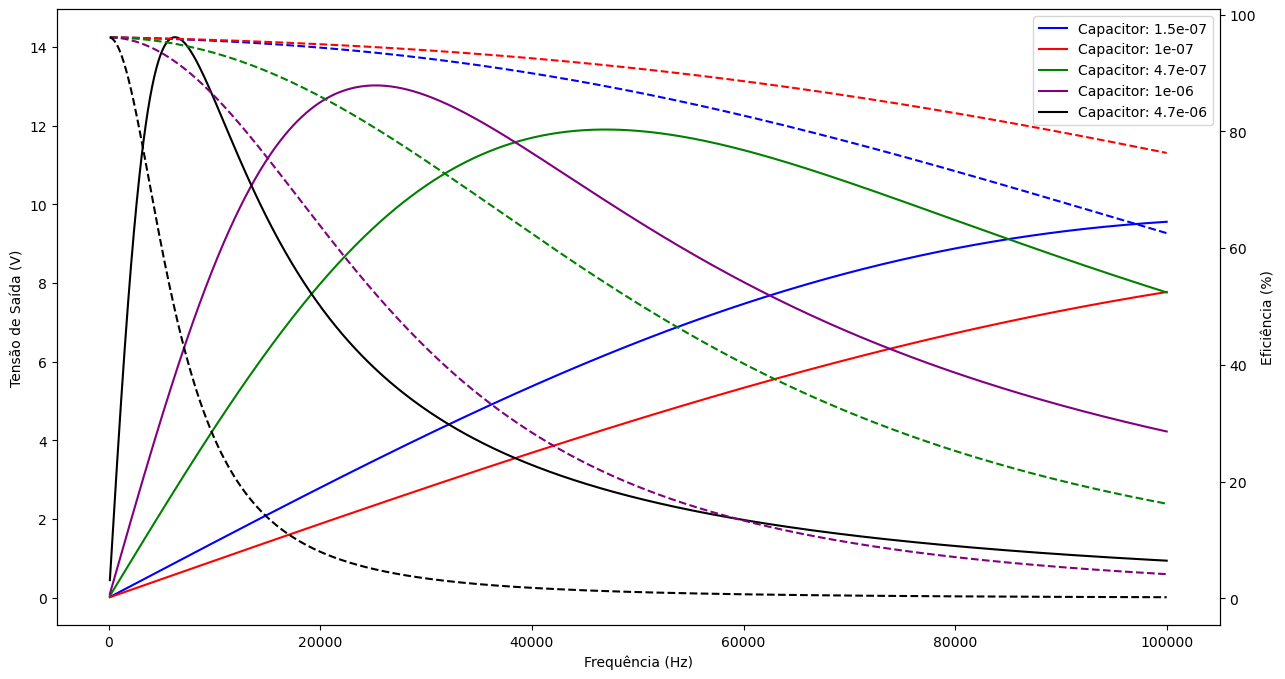

In [10]:
plt.figure(figsize=(12, 6))
fig, Eixo_X1_S = plt.subplots(figsize=(15,8))
Eixo_X2_S = Eixo_X1_S.twinx()
Cores = ['b', 'r', 'g', 'purple', 'black']
Uf = 6
for i, c in enumerate(Capacitores):
    tensoes_serie = []
    eficiencias_serie = []
    for f in frequencias:
        dic = CalculaFinalSerie(f, c, 0.2)
        tensoes_serie.append(dic['V2'])
        eficiencias_serie.append(dic['eficiencia']*100)
    Eixo_X1_S.plot(frequencias, tensoes_serie, color=Cores[i], label='Capacitor: '+str(c))
    Eixo_X2_S.plot(frequencias, eficiencias_serie, color=Cores[i], linestyle='--')
Eixo_X1_S.set_xlabel('Frequência (Hz)')
Eixo_X1_S.set_ylabel('Tensão de Saída (V)')
Eixo_X2_S.set_ylabel('Eficiência (%)')
Eixo_X1_S.legend()

plt.show()

In [11]:
#Tensão de saída do capacitor de 1.5e-7 e frequência de 80000 Hz
print(CalculaFinalSerie(80000, 1.5e-7, 0.2))

#Valor da indutância para o capacitor de 1.5e-7 e frequência de 80000 Hz
print(CalculaIndutância(1.5e-7, CalculaFrequenciaAngular(80000))) 

{'eficiencia': 0.7320727720424577, 'V2': 8.875675448656928}
2.6385724906858796e-05


<Figure size 1200x600 with 0 Axes>

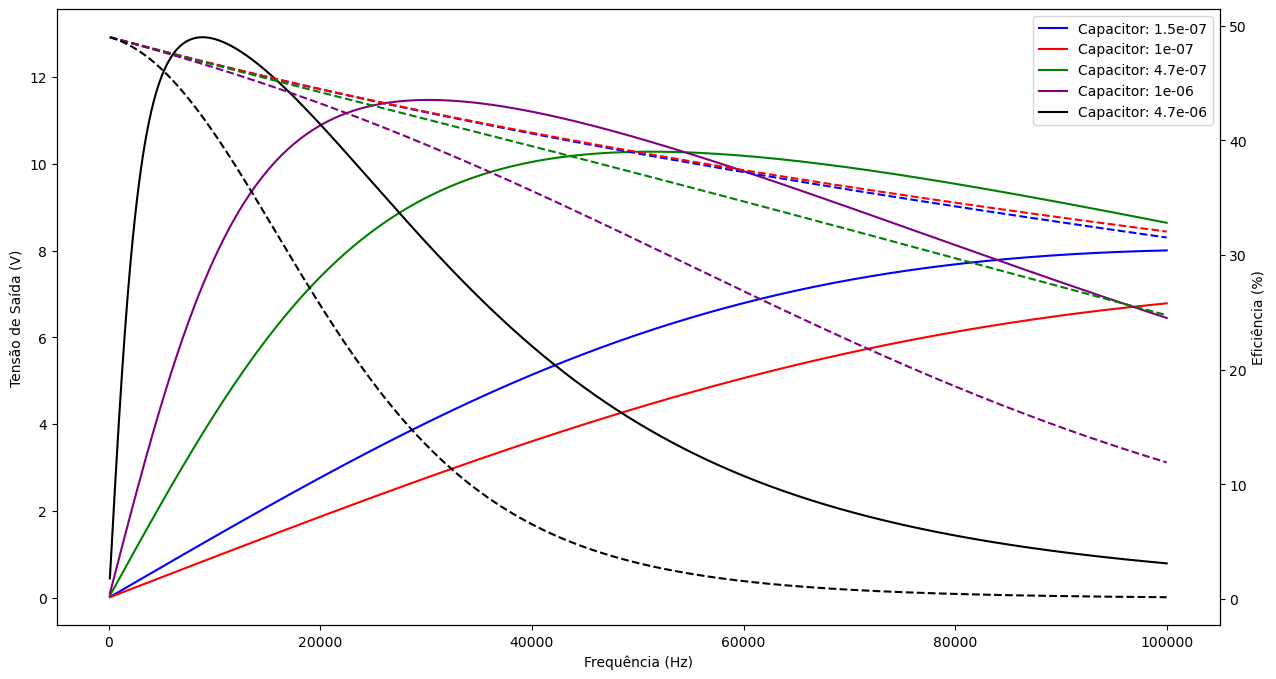

In [12]:
plt.figure(figsize=(12, 6))
fig, Eixo_X1_P = plt.subplots(figsize=(15,8))
Eixo_X2_P = Eixo_X1_P.twinx()
Cores = ['b', 'r', 'g', 'purple', 'black']
Uf = 6
# freq = 80000
# Vpico = CalculaFinalSerie(freq, 1.5e-7)['V2']
# w = CalculaFrequenciaAngular(freq)
# Uf = (2/pi) * Vpico * cos(w * t)
for i, c in enumerate(Capacitores):
    tensoes_paralelo = []
    eficiencias_paralelo = []
    for f in frequencias:
        dic = CalculaFinalParalelo(f, c)
        tensoes_paralelo.append(dic['V2'])
        eficiencias_paralelo.append(dic['eficiencia']*100)
    Eixo_X1_P.plot(frequencias, tensoes_paralelo, color=Cores[i], label='Capacitor: '+str(c))
    Eixo_X2_P.plot(frequencias, eficiencias_paralelo, color=Cores[i], linestyle='--')
Eixo_X1_P.set_xlabel('Frequência (Hz)')
Eixo_X1_P.set_ylabel('Tensão de Saída (V)')
Eixo_X2_P.set_ylabel('Eficiência (%)')
Eixo_X1_P.legend()


In [13]:
Rc2 = np.arange(5,50,5)
ks = np.arange(0,0.5,0.01)
C = 1.5e-7
f = 80000

In [24]:

def CalcularV1(Vpico):
    V1 = (2/np.pi) * Vpico 
    return V1

<Figure size 1200x600 with 0 Axes>

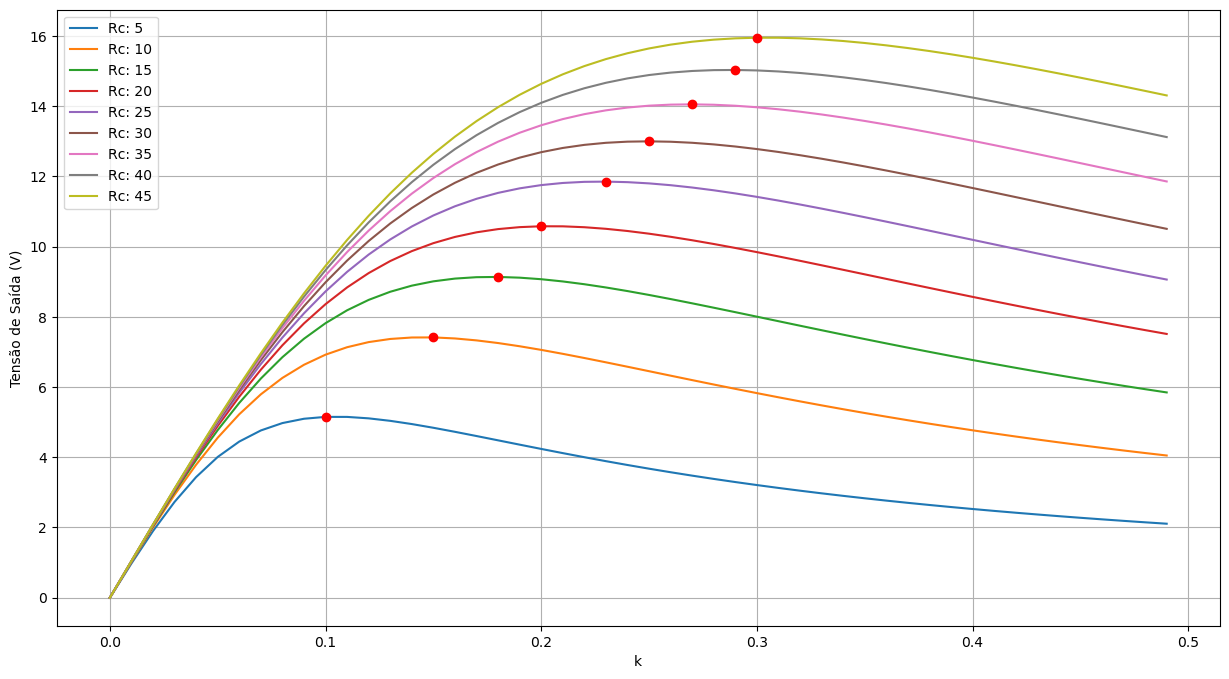

In [25]:
Rdc = 0.2
Rbobina = Rdc + (Rdc * f * 1e-5)
plt.figure(figsize=(12, 6))
fig, Eixo_X1_R = plt.subplots(figsize=(15,8))
for i, r in enumerate(Rc2):
    tensoes_serie = []
    eficiencias_serie = []
    for k in ks:
        _, _, V2, _, _ = CalcularTransformadorSerie(CalcularV1(Uf), r, f, Rbobina, C, k)
        
        tensoes_serie.append(V2)
    Vmax = max(tensoes_serie)
    Eixo_X1_R.plot(ks, tensoes_serie, label='Rc: '+str(r))
    Eixo_X1_R.plot(ks[tensoes_serie.index(Vmax)], Vmax, 'ro')
Eixo_X1_R.set_xlabel('k')
Eixo_X1_R.set_ylabel('Tensão de Saída (V)')
Eixo_X1_R.legend()
plt.grid()
plt.show()